### Collecting DataSet


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\shwet\Downloads\archive (9)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.shape

(1470, 35)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Feature Engineering

In [12]:
df['AttritionFlag'] = df['Attrition'].map({'Yes':1,'No':0})

In [13]:
df['YearsAtCompany']

0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1470, dtype: int64

In [14]:
df['Tenure_group'] = pd.cut(df['YearsAtCompany'],bins=[-1,2,5,10,40],labels=['0-2 Years','3-5 Years','6-10 Years','10+ Years'])

In [16]:
df[['YearsAtCompany','Tenure_group']].head(150)

,YearsAtCompany,Tenure_group
0,6,6-10 Years
1,10,6-10 Years
2,0,0-2 Years
3,8,6-10 Years
4,2,0-2 Years
...,...,...
145,3,3-5 Years
146,5,3-5 Years
147,7,6-10 Years
148,5,3-5 Years


In [18]:
df['IncomeBand']=pd.qcut(df['MonthlyIncome'],q=3,labels=['Low','Medium','High'])

In [19]:
df[['MonthlyIncome','IncomeBand']].head(10)

,MonthlyIncome,IncomeBand
0,5993,Medium
1,5130,Medium
2,2090,Low
3,2909,Low
4,3468,Low
5,3068,Low
6,2670,Low
7,2693,Low
8,9526,High
9,5237,Medium


In [20]:
df['AgeGroup']=pd.qcut(df['Age'],q=3,labels=['Young','Mid','Senior'])

In [24]:
df[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,41,Senior
1,49,Senior
2,37,Mid
3,33,Mid
4,27,Young
5,32,Young
6,59,Senior
7,30,Young
8,38,Mid
9,36,Mid


In [25]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [26]:
Tech_role = [
    'Research Scientist',
    'Laboratory Technician',
    'Manufacturing Director',
    'Healthcare Representative'
]

df['TechFlag']= df['JobRole'].apply(lambda x: 'Tech' if x in Tech_role else 'NonTech')

In [28]:
df[['JobRole','TechFlag']].head(10)

,JobRole,TechFlag
0,Sales Executive,NonTech
1,Research Scientist,Tech
2,Laboratory Technician,Tech
3,Research Scientist,Tech
4,Laboratory Technician,Tech
5,Laboratory Technician,Tech
6,Laboratory Technician,Tech
7,Laboratory Technician,Tech
8,Manufacturing Director,Tech
9,Healthcare Representative,Tech


In [29]:
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']

In [30]:
df[['PromotionGap','YearsAtCompany','YearsSinceLastPromotion']].head(10)

,PromotionGap,YearsAtCompany,YearsSinceLastPromotion
0,6,6,0
1,9,10,1
2,0,0,0
3,5,8,3
4,0,2,2
5,4,7,3
6,1,1,0
7,1,1,0
8,8,9,1
9,0,7,7


### EDA 

### Attrition % By Department

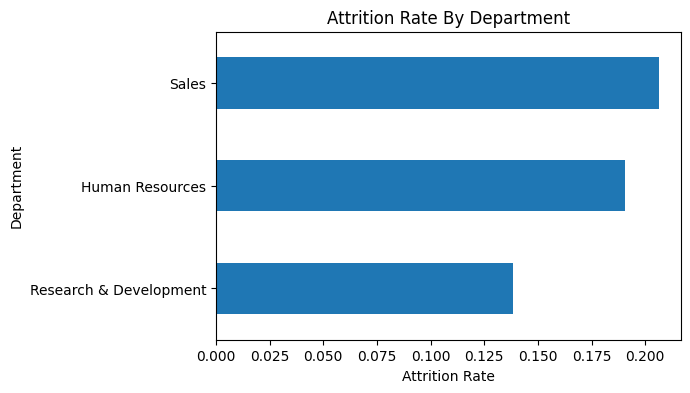

In [31]:
dept_attrition = df.groupby('Department')['AttritionFlag'].mean().sort_values()

dept_attrition.plot(kind='barh',figsize=(6,4),title='Attrition Rate By Department')
plt.xlabel('Attrition Rate')
plt.show()

### Attrition % By Job Role

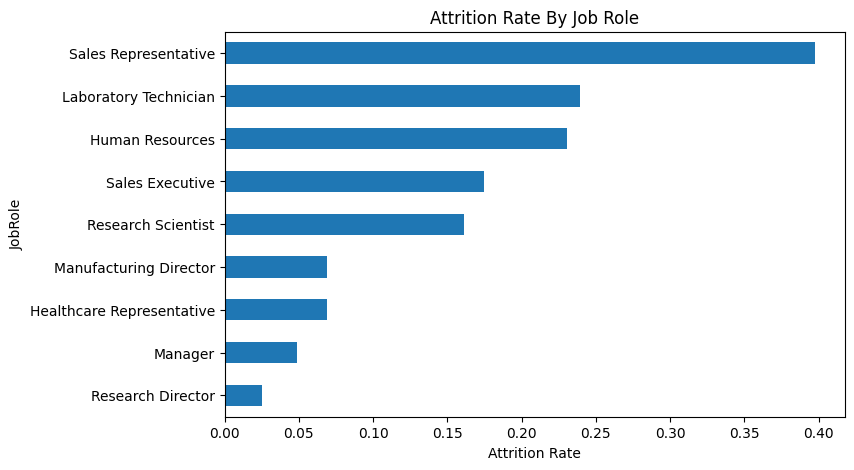

In [32]:
job_attrition = df.groupby('JobRole')['AttritionFlag'].mean().sort_values()

job_attrition.plot(kind='barh',figsize=(8,5),title='Attrition Rate By Job Role')
plt.xlabel('Attrition Rate')
plt.show()

### Attrition % By Tech Role

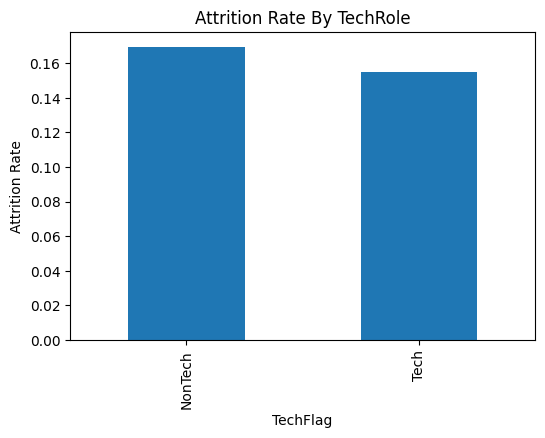

In [34]:
Techrole_attrition = df.groupby('TechFlag')['AttritionFlag'].mean()

Techrole_attrition.plot(kind='bar',figsize=(6,4),title='Attrition Rate By TechRole')
plt.ylabel('Attrition Rate')
plt.show()

### Attrition % By Overtime

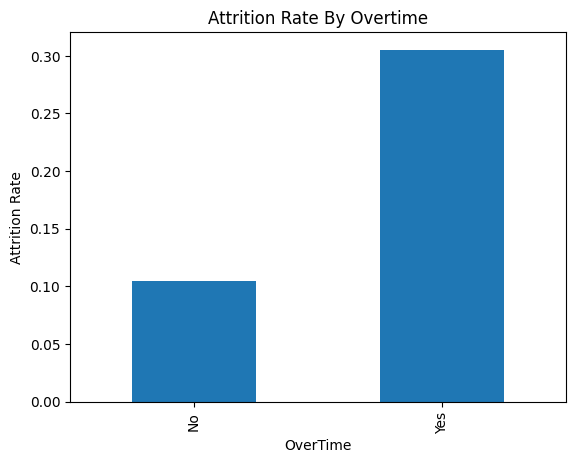

In [35]:
df.groupby('OverTime')['AttritionFlag'].mean().sort_values().plot(kind='bar',title='Attrition Rate By Overtime')
plt.ylabel('Attrition Rate')
plt.show()

### Attrition % By IncomeBand

C:\Users\shwet\AppData\Local\Temp\ipykernel_24280\1930572077.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('IncomeBand')['AttritionFlag'].mean().sort_values().plot(kind='bar',title='Attrition Rate By Income Band')


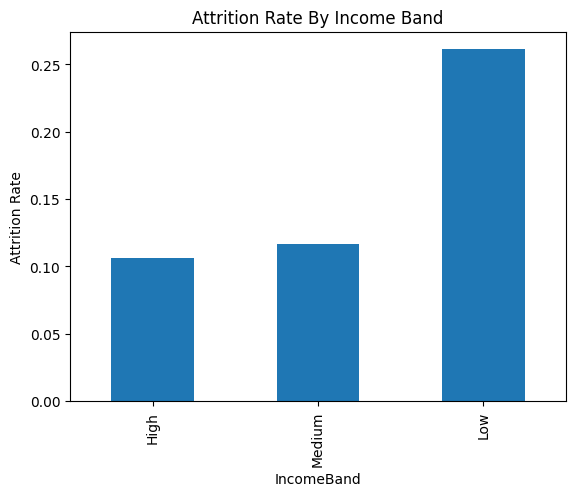

In [36]:
df.groupby('IncomeBand')['AttritionFlag'].mean().sort_values().plot(kind='bar',title='Attrition Rate By Income Band')
plt.ylabel('Attrition Rate')
plt.show()

In [38]:
corr_col = [
    'Age',
    'MonthlyIncome',
    'YearsAtCompany',
    'PromotionGap',
    'JobSatisfaction',
    'WorkLifeBalance',
    'TrainingTimesLastYear',
    'AttritionFlag'
    ]

corr = df[corr_col].corr()

In [40]:
corr

,Age,MonthlyIncome,YearsAtCompany,PromotionGap,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,AttritionFlag
Age,1.000000,0.497855,0.311309,0.249505,-0.004892,-0.021490,-0.019621,-0.159205
MonthlyIncome,0.497855,1.000000,0.514285,0.420630,-0.007157,0.030683,-0.021736,-0.159840
YearsAtCompany,0.311309,0.514285,1.000000,0.852713,-0.003803,0.012089,0.003569,-0.134392
PromotionGap,0.249505,0.420630,0.852713,1.000000,0.007301,0.009335,0.005884,-0.147895
JobSatisfaction,-0.004892,-0.007157,-0.003803,0.007301,1.000000,-0.019459,-0.005779,-0.103481
WorkLifeBalance,-0.021490,0.030683,0.012089,0.009335,-0.019459,1.000000,0.028072,-0.063939
TrainingTimesLastYear,-0.019621,-0.021736,0.003569,0.005884,-0.005779,0.028072,1.000000,-0.059478
AttritionFlag,-0.159205,-0.159840,-0.134392,-0.147895,-0.103481,-0.063939,-0.059478,1.000000


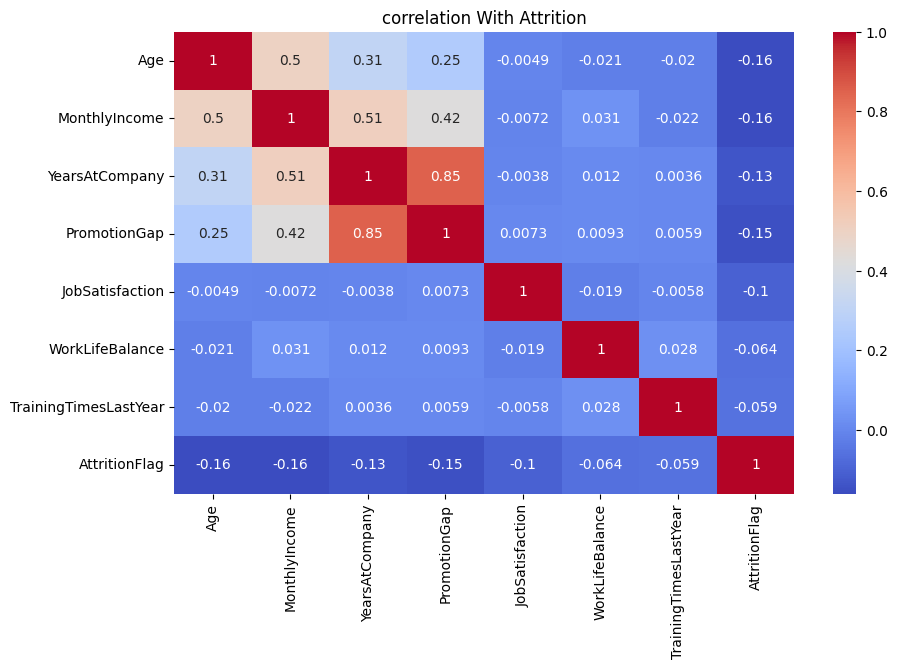

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation With Attrition')
plt.show()


In [43]:
import pyodbc

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=SHWETA;"
    "DATABASE=Workflow;"
    "Trusted_Connection=yes;"
)

print("✅ Connected to SQL Server successfully")


✅ Connected to SQL Server successfully


In [44]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "mssql+pyodbc://@SHWETA/Workflow?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

df.to_sql("employee_attrition", engine, if_exists="replace", index=False)

42

In [45]:
df['Education'].unique()

array([2, 1, 4, 3, 5])